# House Price Prediction using Linear Regression
**Dataset:** California Housing Dataset  
**Task:** AI & ML – Task 1  
**Objective:** Build and evaluate a Linear Regression model to predict house prices using the California Housing dataset.

This notebook follows the complete ML workflow:
- Data loading
- Exploratory Data Analysis (EDA)
- Data preprocessing
- Model training
- Model evaluation
- Result visualization


In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [19]:
# Load California Housing dataset
data = fetch_california_housing(as_frame=True)

# Combine features and target into one DataFrame
df = pd.concat([data.data, data.target.rename("MedHouseVal")], axis=1)

# Preview data
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Exploratory Data Analysis (EDA)

We start by understanding the dataset structure, checking for missing values, and reviewing basic statistics.


In [20]:
# Shape of dataset
df.shape


(20640, 9)

In [21]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [22]:
# Statistical summary
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [23]:
# Check for missing values
df.isnull().sum()


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


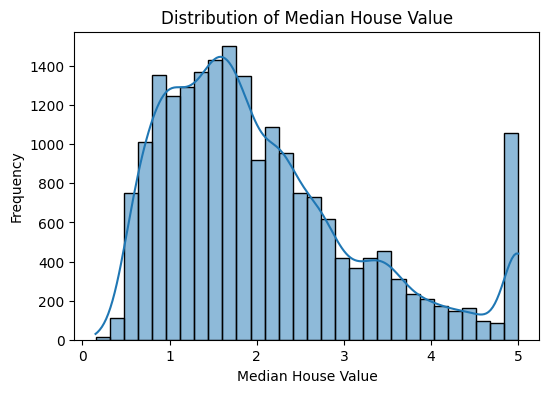

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df["MedHouseVal"], bins=30, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


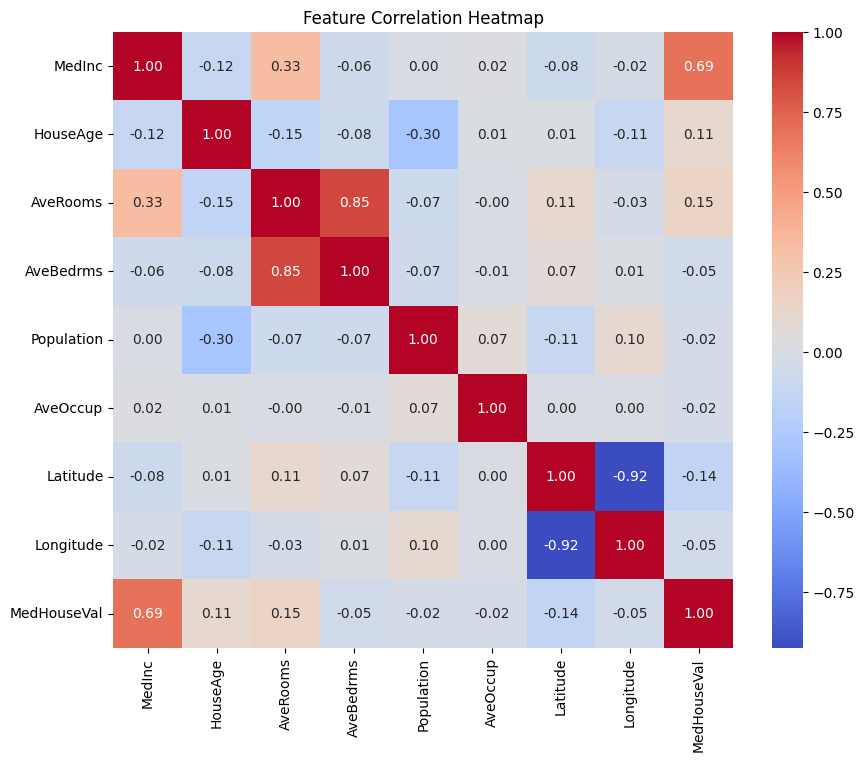

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


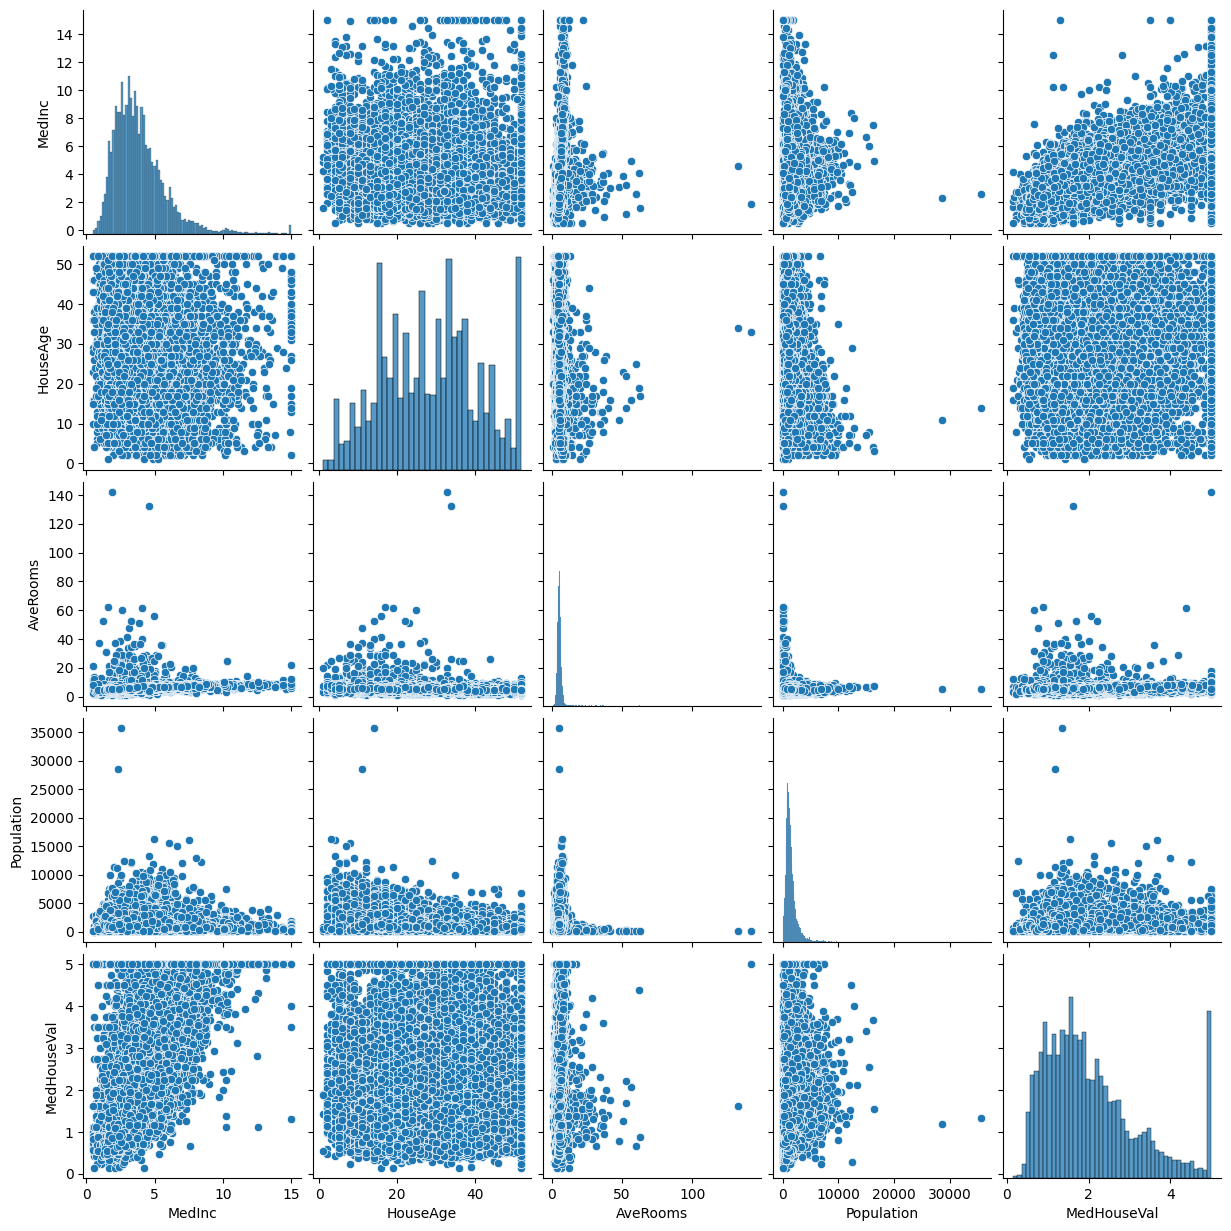

In [26]:
sns.pairplot(df[["MedInc", "HouseAge", "AveRooms", "Population", "MedHouseVal"]])
plt.show()


### EDA Observations
- The dataset contains no missing values.
- Median House Value shows a slightly right-skewed distribution.
- Median Income has the strongest positive correlation with house prices.
- Geographic features (Latitude, Longitude) also influence house prices.
- Some features show multicollinearity, which may affect linear regression performance.


## Model Training
We now split the dataset into features and target, followed by train-test splitting.


In [27]:
# Features and target
X = df.drop(columns="MedHouseVal")
y = df["MedHouseVal"]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [30]:
# Predict on test data
y_pred = model.predict(X_test)


### Model Training Summary
- The dataset was split into training (80%) and testing (20%) sets.
- A Linear Regression model was trained using the training data.
- Predictions were generated on the test set for evaluation.


## Model Evaluation
The model performance is evaluated using MAE, RMSE, and R² score.


In [31]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.5332001304956553, np.float64(0.7455813830127764), 0.5757877060324508)

### Evaluation Interpretation
- The MAE indicates the average prediction error in house value.
- RMSE penalizes larger errors and provides a measure of overall model accuracy.
- The R² score shows that the model explains a significant portion of the variance in house prices.
- While the model performs reasonably well, there is room for improvement using advanced models.


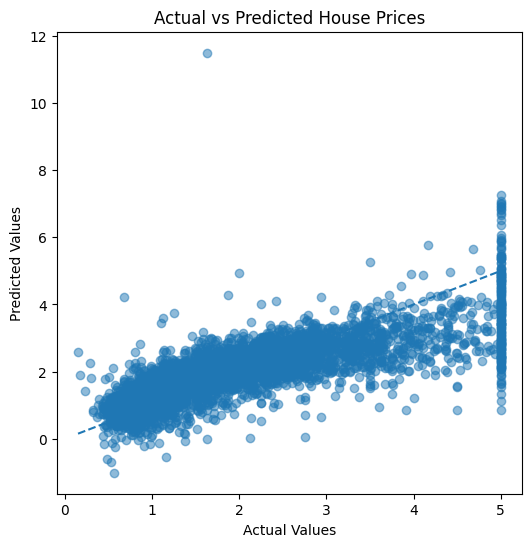

In [32]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted House Prices")
plt.show()


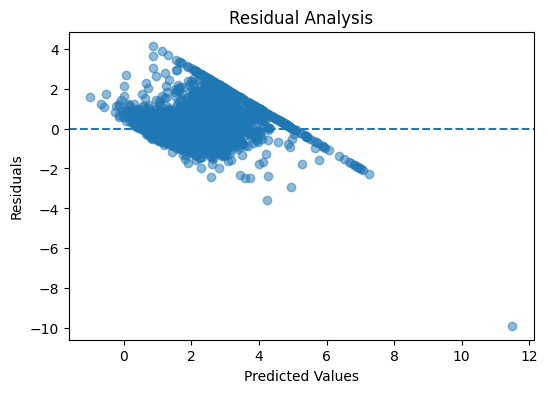

In [33]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Analysis")
plt.show()


### Visualization Insights
- The Actual vs Predicted plot shows a positive linear relationship.
- Some dispersion around the diagonal line indicates prediction errors.
- Residuals are roughly centered around zero, suggesting no strong bias.
